<a href="https://colab.research.google.com/github/zaeyonz/Fish_distribution/blob/main/fish_distribution(data_preprocessing).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***training data 와 test data 준비***

In [69]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [70]:
import numpy as np

# ***Numpy의 column_stack()***

*   column_stack() 함수는 전달 받은 리스트를 일렬로 세운 다음 차례대로 나란히 연결함
*   연결한 리스트는 튜플(tuple) 형식으로 전달함



In [71]:
np.column_stack(([1,2,3],[4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [72]:
fish_data = np.column_stack((fish_length, fish_weight))

In [73]:
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


# ***target data 준비***

*   np.ones 와 np.zeros를 사용하여 배열을 생성
*   np.column_stack() 함수는 열 방향으로 연결(열 추가)
*   np.concatenate() 함수는 행 방향으로 연결(행 추가)

In [74]:
print(np.ones(5))

[1. 1. 1. 1. 1.]


In [75]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [76]:
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


# ***Scikit-Learn으로 training set 와 test set 나누기***

*   train_test_split() 함수는 Scikit-Learn의 model_selsction 모듈 아래에 있음
*   train_test_split() 함수는 전달 되는 리스트나 배열을 비율에 맞게 training set 와 test set로 나눠줌

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
#처음 2개는 입력 데이터(train_input, test_input), 나머지 2개는 타깃 데이터(train_target, test_target)

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)

In [79]:
print(train_input.shape,',' ,test_input.shape)

(36, 2) , (13, 2)


In [80]:
print(train_target.shape,',',test_target.shape) # train data = 35, test data = 13

(36,) , (13,)


In [81]:
print(test_target) # 13개의 테스트 세트중 10개가 도미(1)이고, 3개가 빙어(0)임 --> 현재 두 생선의 비율은 2.5:1 이지만 이 테스트 세트의 비율은 3.3:1 임 --> 샘플링 편향!!

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [82]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify= fish_target, random_state=42)

In [83]:
print(test_target)  # 빙어(0)이 하나 늘었음 --> 비율이 2.25:1로 비슷해짐

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


# ***Model & Training***

*   K-Neighbor Classifier 사용



In [84]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

# ***문제가 되는 샘플을 넣고 결과 확인***

In [85]:
print(kn.predict([[25,150]]))

## 도미(1)로 예측돼야 할 [25,150]의 값이 빙어(0)으로 나옴!

[0.]


# ***문제가 되는 샘플을 산점도로 확인***

TypeError: ignored

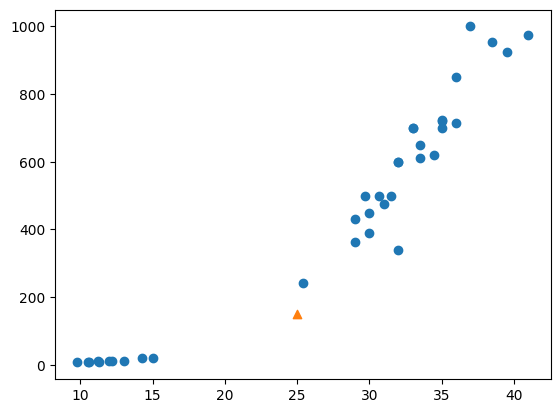

In [91]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25, 150, marker='^')                    #marker 매개변수는 모양을 지정함
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# ***문제점 해결***

*   KNeighborsClasifier 클래스는 주어진 샘플에서 가장 가까운 이웃을 찾아주는 kneighbors() 메서드를 제공
*   이 메서드는 이웃까지의 거리와 이웃 샘플의 인덱스를 반환함
*   n_neighbors의 기본값은 5이므로 5개의 이웃이 반환됨.



In [ ]:
distances, indexes = kn.kneighbors(([[25,150]]))        #kn.kneighbor() 메서드로 distaces와 indexes에 [25,150] 샘플에 가까운 5개 샘플의 이웃까지의 거리와 이웃 샘플의 인덱스를 저장함

TypeError: ignored

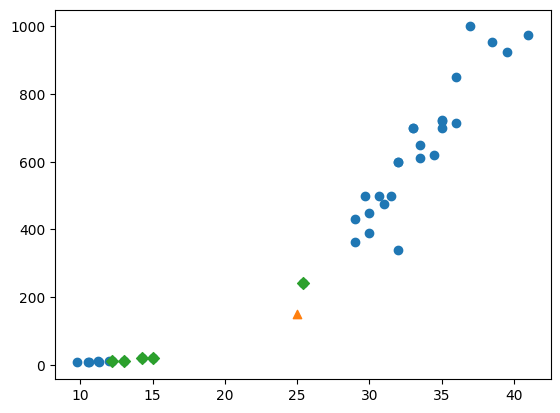

In [ ]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1],marker = 'D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

*삼각형 샘플에 가장 가까운 5개의 샘플이 초록 다이아몬드로 표시 됨*
*예측 결과와 마찬가지로 가장 가까운 이웃에 도미가 하나 밖에 없음*
*따라서 kneighbor() 메서드는 빙어로 잘못 판단함.*

In [ ]:
print(train_input[indexes])         #indexes로 지정된 샘플의 수치, 빙어가 더 많아 보임

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [ ]:
print(train_target[indexes])    #빙어(0)이 더 많음

[[1. 0. 0. 0. 0.]]




---


*   *문제를 해결하기 위해 kneighbors() 메서드에서 반환한 distances 배열을 출력함*
*  *이 배열에는 이웃 샘플까지의 거리가 담겨 있음*



---



In [ ]:
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


---


*   산점도가 x축은 범위가 좁고(10 ~ 40), y축은 범위가 넓은(0 ~ 1000) 형태를 갖고 있음
*   따라서 y축으로 조금만 멀어져도 거리가 아주 큰 값으로 계산됨
*   이 때문에 오른쪽 위의 도미 샘플이 이웃으로 선택되지 못함
---



TypeError: ignored

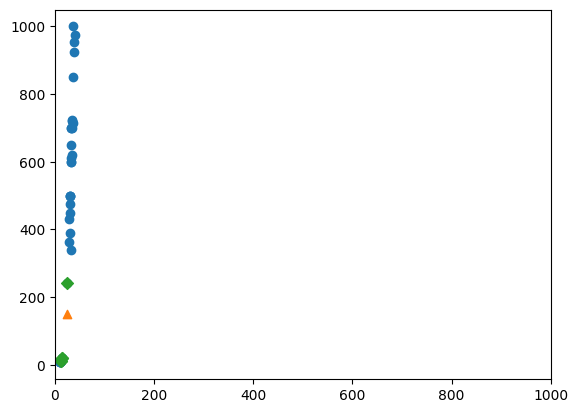

In [92]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1],marker = 'D')
plt.xlim((0,1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

------------


*   x축의 범위를 동일하게 0 ~ 1000으로 변경하니 모든 데이터가 수직으로 늘어선 형태가 됨
*   확실히 생선의 길이(x축)는 가장 가까운 이웃을 찾는데 큰 영향을 주지 않음
*    ***오직 생선의 무게(y축)만 고려 대상이 됨***
*   두 특성(길이와 무게)의 값이 놓인 범위가 매우 다름, 이를 두 특성의 ***스케일(scale)*** 이 다르다고 함

------------


# ***Data preprocessing (데이터 전처리)***



*   가장 널리 사용하는 전처리 방법 중 하나는 ***표준 점수(standard score) (z점수라고도 불림)***임
*   표준 점수는 각 특성값이 평균에서 표준편차의 몇 배만큼 떨어져 있는지를 나타냄
*   실제 특성값의 크기와 상관없이 동일한 조건으로 비교 가능


In [ ]:
#각 특성별로 계산해야 하므로 axis=0 --> 행을 따라 각 열의 통계값을 계산
#np.mean()은 평균, np.std()는 표준편차를 계산함

mean = np.mean(train_input, axis=0)
std = np.std(train_input , axis=0)

In [ ]:
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [ ]:
#원본 데이터에서 평균을 빼고 표준편차로 나누어 표준 점수로 변환

train_scaled = (train_input - mean) / std

# ***Model Training - Using preprocessed data***

TypeError: ignored

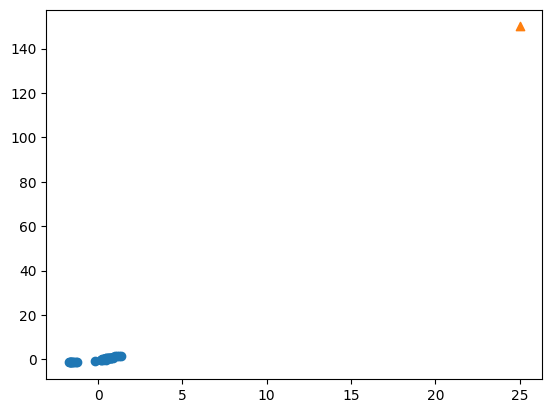

In [ ]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

---
* 예상과는 다른 산점도가 나옴
* training set를 mean으로 빼고 std로 나누어 주었기 때문에 값의 범위가 크게 달라짐
* 따라서 샘플 [25, 150]의 값도 동일한 비율로 변환해야 함
---

TypeError: ignored

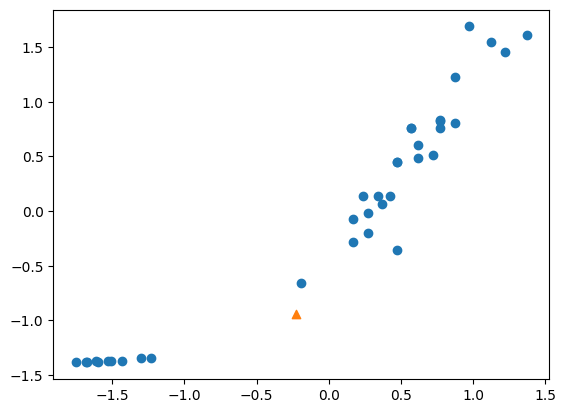

In [ ]:
new = ([25, 150] - mean) / std    #샘플 값의 표준 점수 변환

plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0], new[1],marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

---
*   표준편차로 변환하기 전의 산점도와 거의 동일함
*   x축과 y축의 범위가 -1.5 ~ 1.5사이로 바뀜
---

In [ ]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [ ]:
#훈련을 마치고 테스트를 평가할 때 주의점
#test sample도 train sample과 마찬가지로 변환시켜야함 --> why? 데이터의 스케일이 달라져서 훈련한 모델이 쓸모 없어짐

test_scaled = (test_input - mean) / std

In [ ]:
kn.score(test_scaled, test_target)

1.0

In [ ]:
print(kn.predict([new]))

[1.]


TypeError: ignored

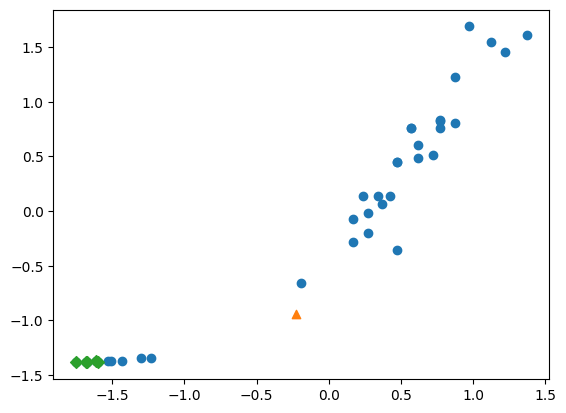

In [93]:
#kneighbors() 함수로 샘플의 k-최근접 이웃을 구한 다음 산점도를 그림

distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0], new[1], marker = '^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker = 'D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()